In [1]:
# Importing Libraries...
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset..
df_comp_data=pd.read_csv('Company Stock and Investment.csv',parse_dates=['Date'])
df_comp_data.head()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
0,2009-12-31,0.025417,0.000150,0.017354,0.006848
1,2010-04-01,0.026830,0.001097,0.015565,-0.004609
2,2010-05-01,0.002699,0.001560,0.001729,0.005900
3,2010-06-01,0.021688,0.006009,-0.015906,-0.018116
4,2010-07-01,-0.006256,0.000221,-0.001849,-0.017013


In [3]:
# Displaying few rows...
df_comp_data.tail()

,Date,Oil Investments,Gold Investments,Comp Stock,Other sharesInvestments
1979,2017-09-11,0.005984,0.000623,-0.002043,-0.003310
1980,2017-10-11,-0.007173,-0.000389,-0.006880,-0.003348
1981,2017-11-13,0.000352,-0.004944,-0.004008,0.003395
1982,2017-11-14,-0.019376,-0.002621,-0.015118,0.006793
1983,2017-11-15,-0.007006,0.005963,-0.013190,-0.008928


In [4]:
# chechking the features,duplicate values and nan values in the Datasets

print("\nFeatures/Columns : \n", df_comp_data.columns)
print("\n\nNumber of Features/Columns : ", len(df_comp_data.columns))
print("\nNumber of Rows : ",len(df_comp_data))
print("\n\nData Types :\n", df_comp_data.dtypes)
print("sum of duplicated values{}\n".format(df_comp_data.duplicated().sum()))
print("\nContains NaN/Empty cells : ", df_comp_data.isnull().values.any())
print("\nTotal empty cells by column :\n", df_comp_data.isnull().sum(),"\n\n")


Features/Columns : 
 Index(['Date', 'Oil Investments', 'Gold Investments', 'Comp Stock',
       'Other sharesInvestments'],
      dtype='object')


Number of Features/Columns :  5

Number of Rows :  1984


Data Types :
 Date                       datetime64[ns]
Oil Investments                   float64
Gold Investments                  float64
Comp Stock                        float64
Other sharesInvestments           float64
dtype: object
sum of duplicated values0


Contains NaN/Empty cells :  False

Total empty cells by column :
 Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64 




In [5]:
# Making a DataFrame consisting of 'Date' as index and only Gold investments data as a single feature...
df_gold_investment=pd.DataFrame({'Date':df_comp_data['Date'],'Gold Investments':df_comp_data['Gold Investments']},)
df_gold_investment.set_index('Date',inplace=True)
df_gold_investment

,Gold Investments
Date,
2009-12-31,0.000150
2010-04-01,0.001097
2010-05-01,0.001560
2010-06-01,0.006009
2010-07-01,0.000221
...,...
2017-09-11,0.000623
2017-10-11,-0.000389
2017-11-13,-0.004944


In [6]:
# Getting Stastistical information...
df_gold_investment.describe()

,Gold Investments
count,1984.000000
mean,-0.020152
std,0.140965
min,-1.000000
25%,-0.005881
50%,0.000000
75%,0.005454
max,0.049577


## Step 2: Visualize the Data

Text(0.5, 1.0, 'Gold Investments Per Year ')

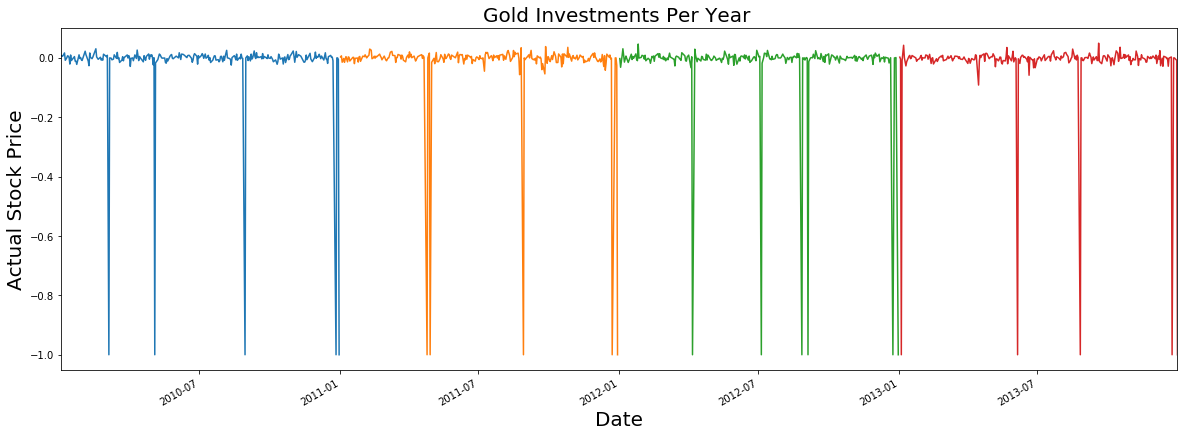

In [7]:
# Plotting graphs for different year to get better knowledge of the seasonality of the data(for year 2010 -2013)...
plt.subplots(figsize=(20,7))
df_gold_investment.loc['2010', 'Gold Investments'].plot()
df_gold_investment.loc['2011', 'Gold Investments'].plot()
df_gold_investment.loc['2012', 'Gold Investments'].plot()
df_gold_investment.loc['2013', 'Gold Investments'].plot()
plt.xlabel('Date',fontsize=20)
plt.ylabel('Actual Stock Price',fontsize=20)
plt.title("Gold Investments Per Year ",fontsize=20)

Text(0.5, 1.0, 'Gold Investments Per Year ')

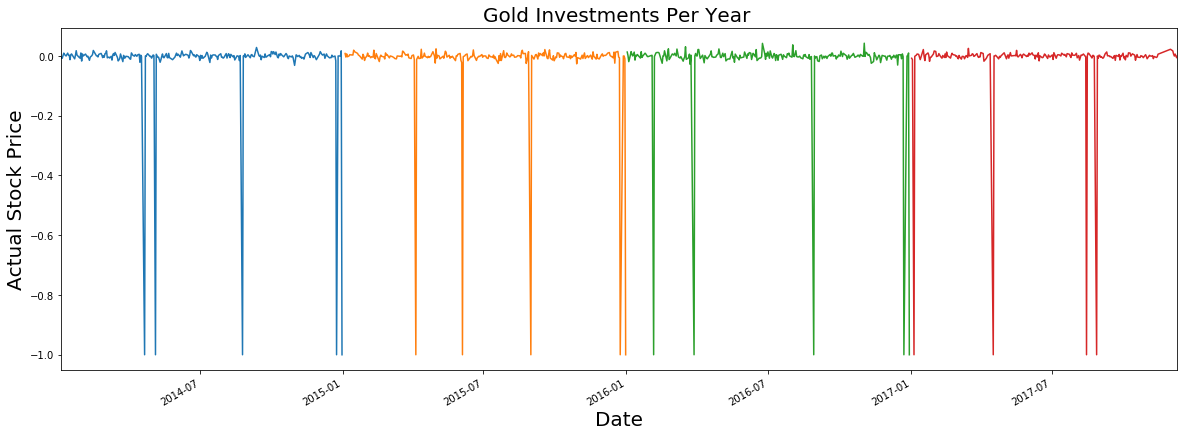

In [8]:
# Plotting graphs for different year to get better knowledge of the seasonality of the data(2014 -2017)...
plt.subplots(figsize=(20,7))
df_gold_investment.loc['2014', 'Gold Investments'].plot()
df_gold_investment.loc['2015', 'Gold Investments'].plot()
df_gold_investment.loc['2016', 'Gold Investments'].plot()
df_gold_investment.loc['2017', 'Gold Investments'].plot()
plt.xlabel('Date',fontsize=20)
plt.ylabel('Actual Stock Price',fontsize=20)
plt.title("Gold Investments Per Year ",fontsize=20)

### In above plot data looks like seasonal data. Now we will check if data is stationary or not

In [9]:
# Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df_gold_investment['Gold Investments']) # adfuller give us 5 values

In [10]:
# showing the ouput of test_result
print(" The Values given as output by adfuller is : \n 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'\n\n",test_result)

 The Values given as output by adfuller is : 
 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

 (-15.906853851669009, 8.208405770369951e-29, 7, 1976, {'1%': -3.4336636717018405, '5%': -2.8630037919874423, '10%': -2.567549261922421}, -2147.421096479902)


### Most important value is p-value above

In [11]:
#Ho: It is non stationary
#H1: It is stationary
### Testing For Stationarity

def adfuller_test(data):
    result=adfuller(data) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [12]:
# Printing adfuller Values..
adfuller_test(df_gold_investment['Gold Investments'])

ADF Test Statistic : -15.906853851669009
p-value : 8.208405770369951e-29
#Lags Used : 7
Number of Observations Used : 1976
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


**As p value is less then .05 we are going to reject the null hypothesis-- Stationary**

Text(0.5, 1.0, 'Loess Smoothed 15% ')

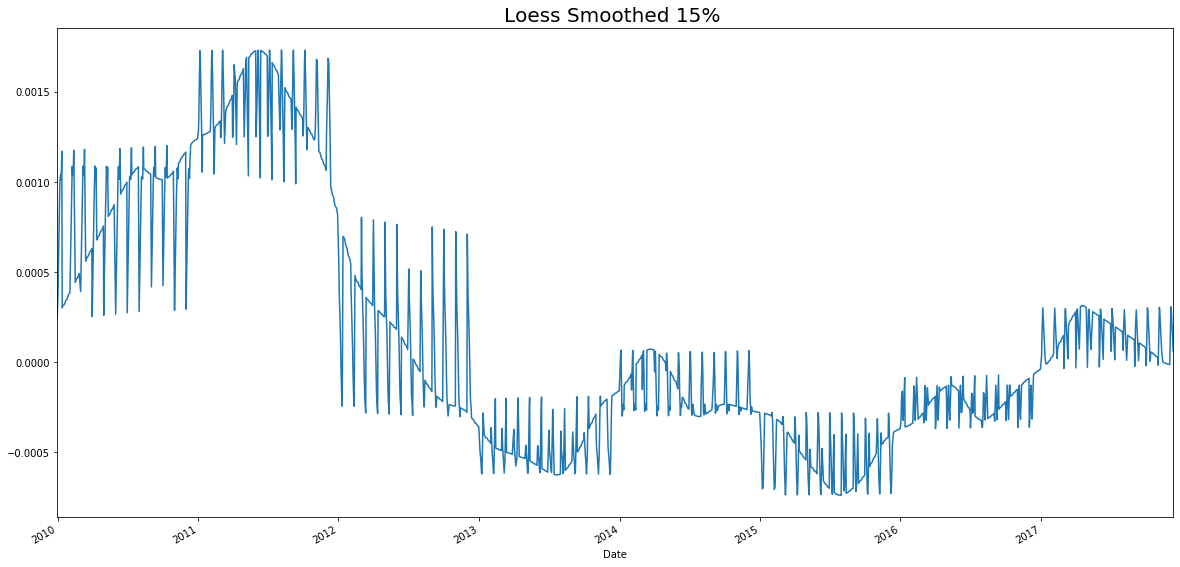

In [13]:
# Smooth graph for the Gold investment data...
from statsmodels.nonparametric.smoothers_lowess import lowess
df_smooth_15 = pd.DataFrame(lowess(df_gold_investment['Gold Investments'], np.arange(len(df_gold_investment['Gold Investments'])), frac=0.15)[:, 1], index=df_gold_investment.index, columns=['Gold Investments'])
df_smooth_15['Gold Investments'].plot( figsize=(20,10))
plt.title("Loess Smoothed 15% ",fontsize=20)

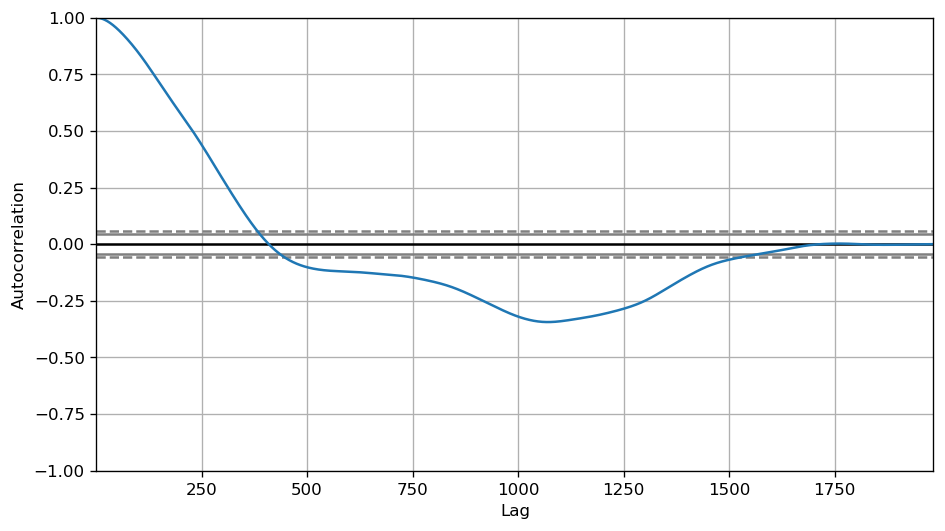

In [14]:
# plotting the correlation plot for the smooth data..
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df_smooth_15['Gold Investments'])

C:\Users\hp\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:409: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


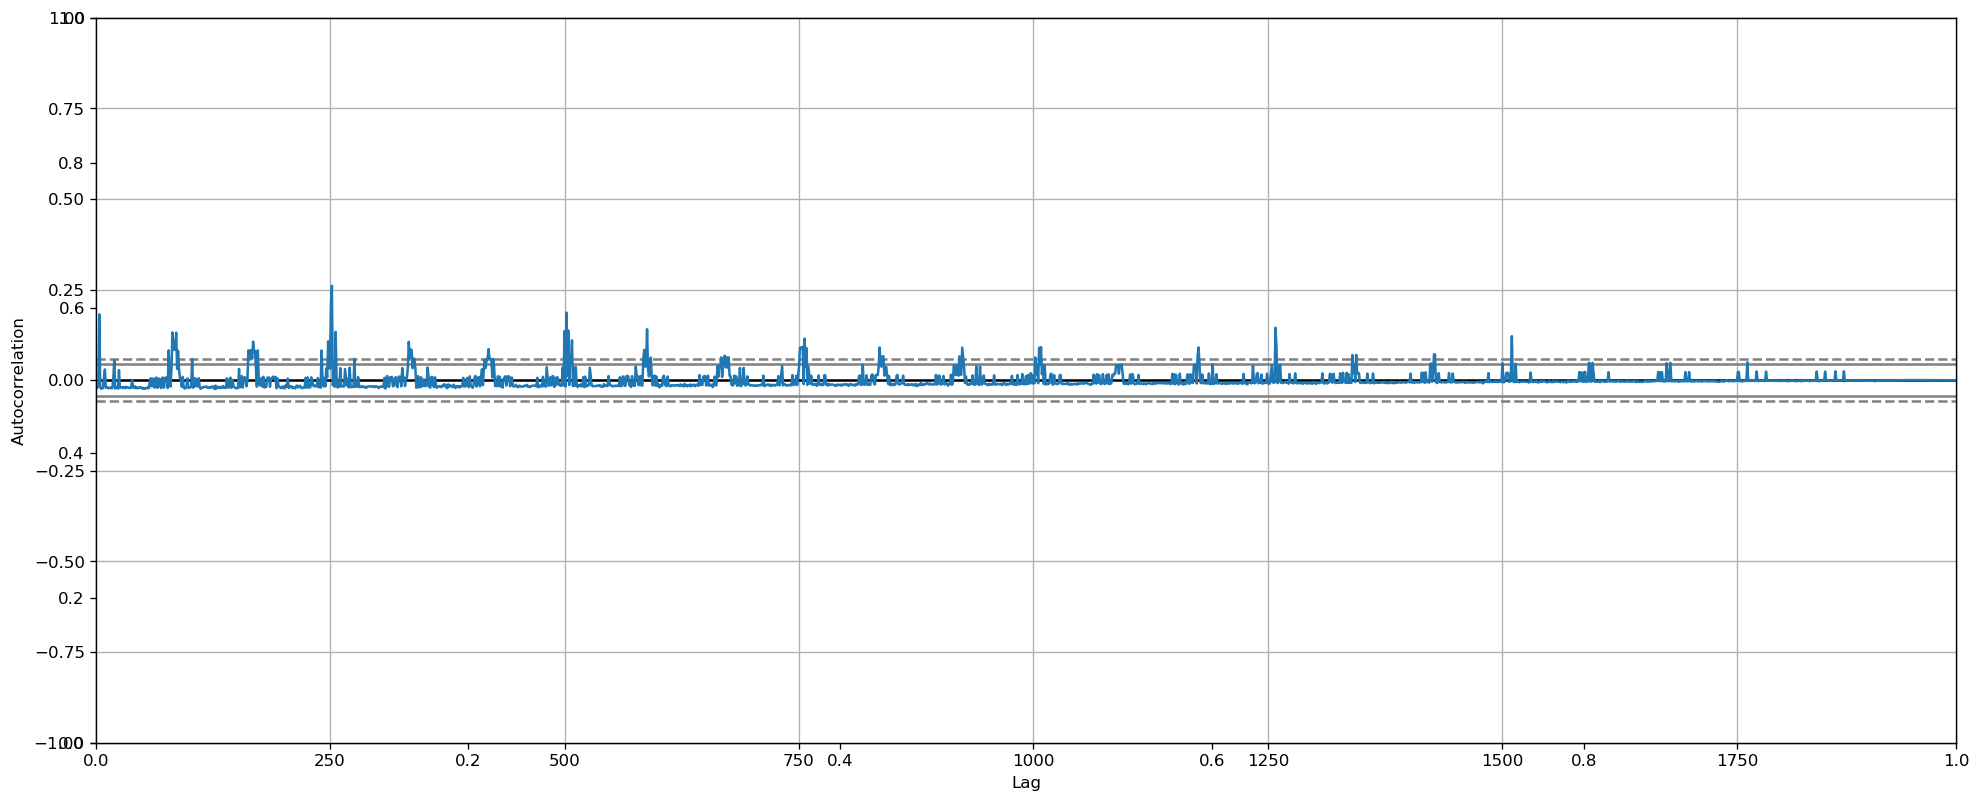

In [15]:
# plotting the correlation plot for the actual data..
from pandas.plotting import autocorrelation_plot
plt.subplots(figsize=(20,8))
autocorrelation_plot(df_gold_investment['Gold Investments'])
plt.show()



**In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:**

**1) p – The lag value where the PACF chart crosses the upper confidence interval for the first time.**              
**2) q – The lag value where the ACF chart crosses the upper confidence interval for the first time.**            

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


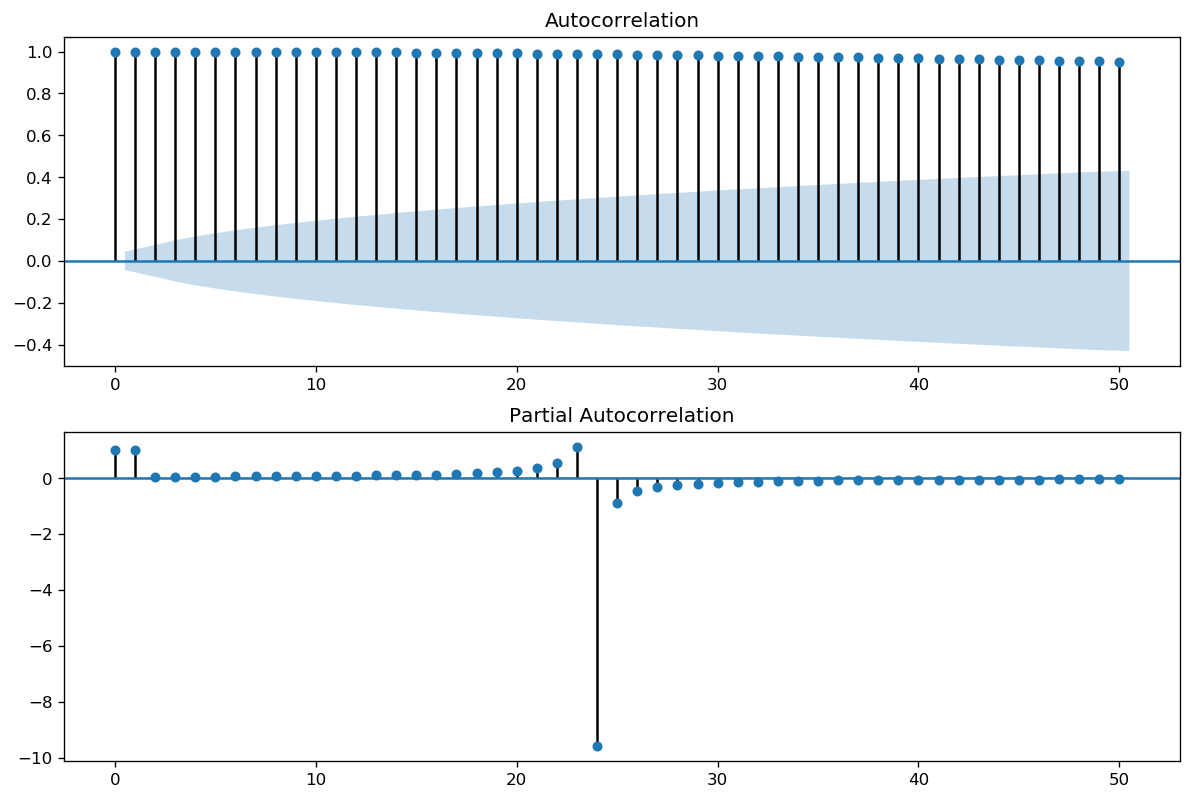

In [16]:
# Plotting autocorreltion plot partial autocorreltion plot for the smooth data
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df_smooth_15['Gold Investments'].iloc[1:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_smooth_15['Gold Investments'].iloc[1:],lags=50,ax=ax2)

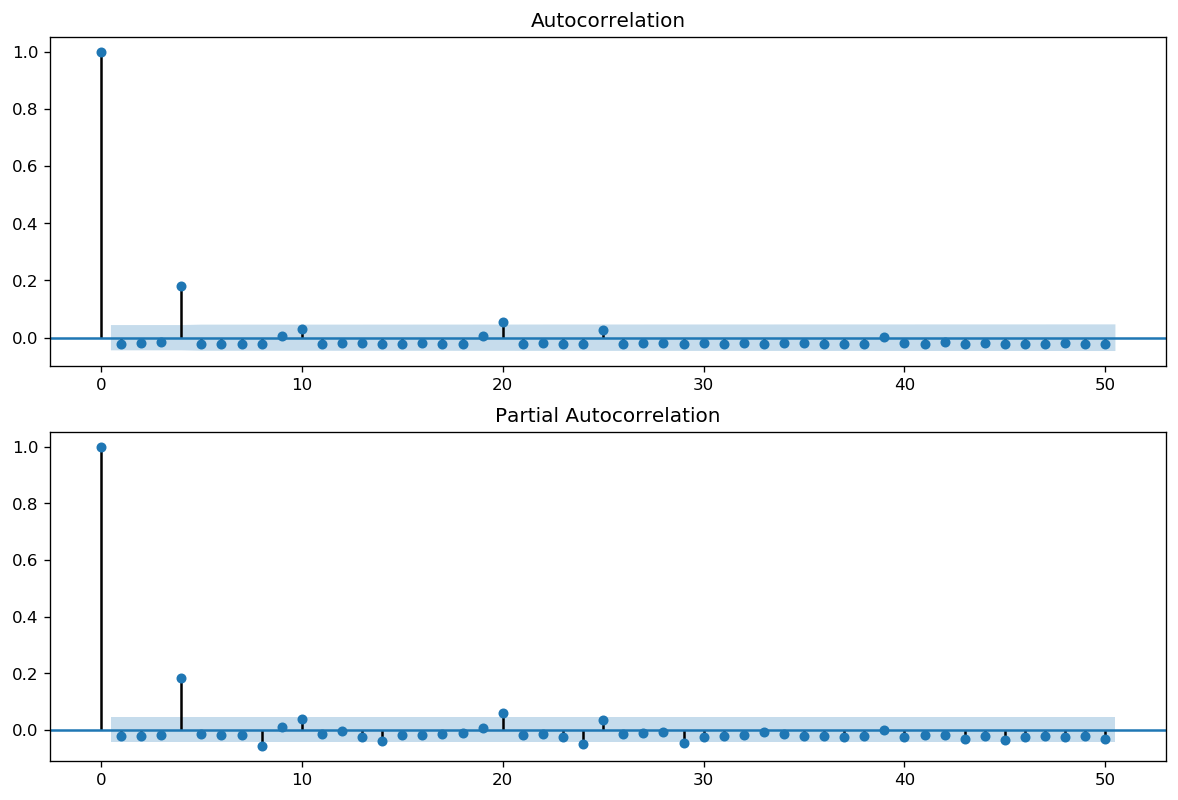

In [17]:
# Plotting autocorreltion plot partial autocorreltion plot  for the actual data..
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(df_gold_investment['Gold Investments'].iloc[13:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_gold_investment['Gold Investments'].iloc[13:],lags=50,ax=ax2)

**Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).**      

**Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4**    

## Testing

In [18]:
# Create Training and validation sets of the actual data..
train = df_gold_investment['Gold Investments'][:1512]
validation=df_gold_investment['Gold Investments'][1513:1986]


### Plotting ACF and PACF graphs will get us p and q values and d=0 as the data is stationary but above ACF and PACf graphs are not giveing a clear picture thus using Auto-ARIMA.
### In Auto ARIMA, the model itself will generate the optimal p, d, and q values which would be suitable for the data set to provide better forecasting.

In [19]:
# using Auto arima to find the best model with best parameter value
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  # don't want to know if an order does not work
                         suppress_warnings=True, # don't want convergence warnings
                         stepwise=True) # set to stepwise


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=12.40 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-562.871, Time=0.70 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-966.509, Time=4.03 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=7.77 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-564.804, Time=0.15 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-560.876, Time=0.53 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-1131.054, Time=10.91 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=29.71 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=10.87 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-1132.966, Time=10.81 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=-968.262, Time=2.03 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=25.58 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=11.60 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=-1131.054, Time=10.71 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   :

In [20]:
# printing model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                 1512
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                 570.434
Date:                  Sun, 01 Nov 2020   AIC                          -1134.869
Time:                          19:02:57   BIC                          -1118.929
Sample:                               0   HQIC                         -1128.930
                                 - 1512                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6587      0.012    -53.635      0.000      -0.683      -0.635
ar.S.L24      -0.3288      0.012    -26.317      0.000      -0.353      -0.304
sigma2         0.0273      0.000    102.081      0.000       0.027       0.028
===================================================================================
Ljung-Box (Q):                      224.92   Jarque-Bera (JB):             45328.50
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            -4.09
Prob(H) (two-sided):                  0.66   Kurtosis:                        28.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecasting

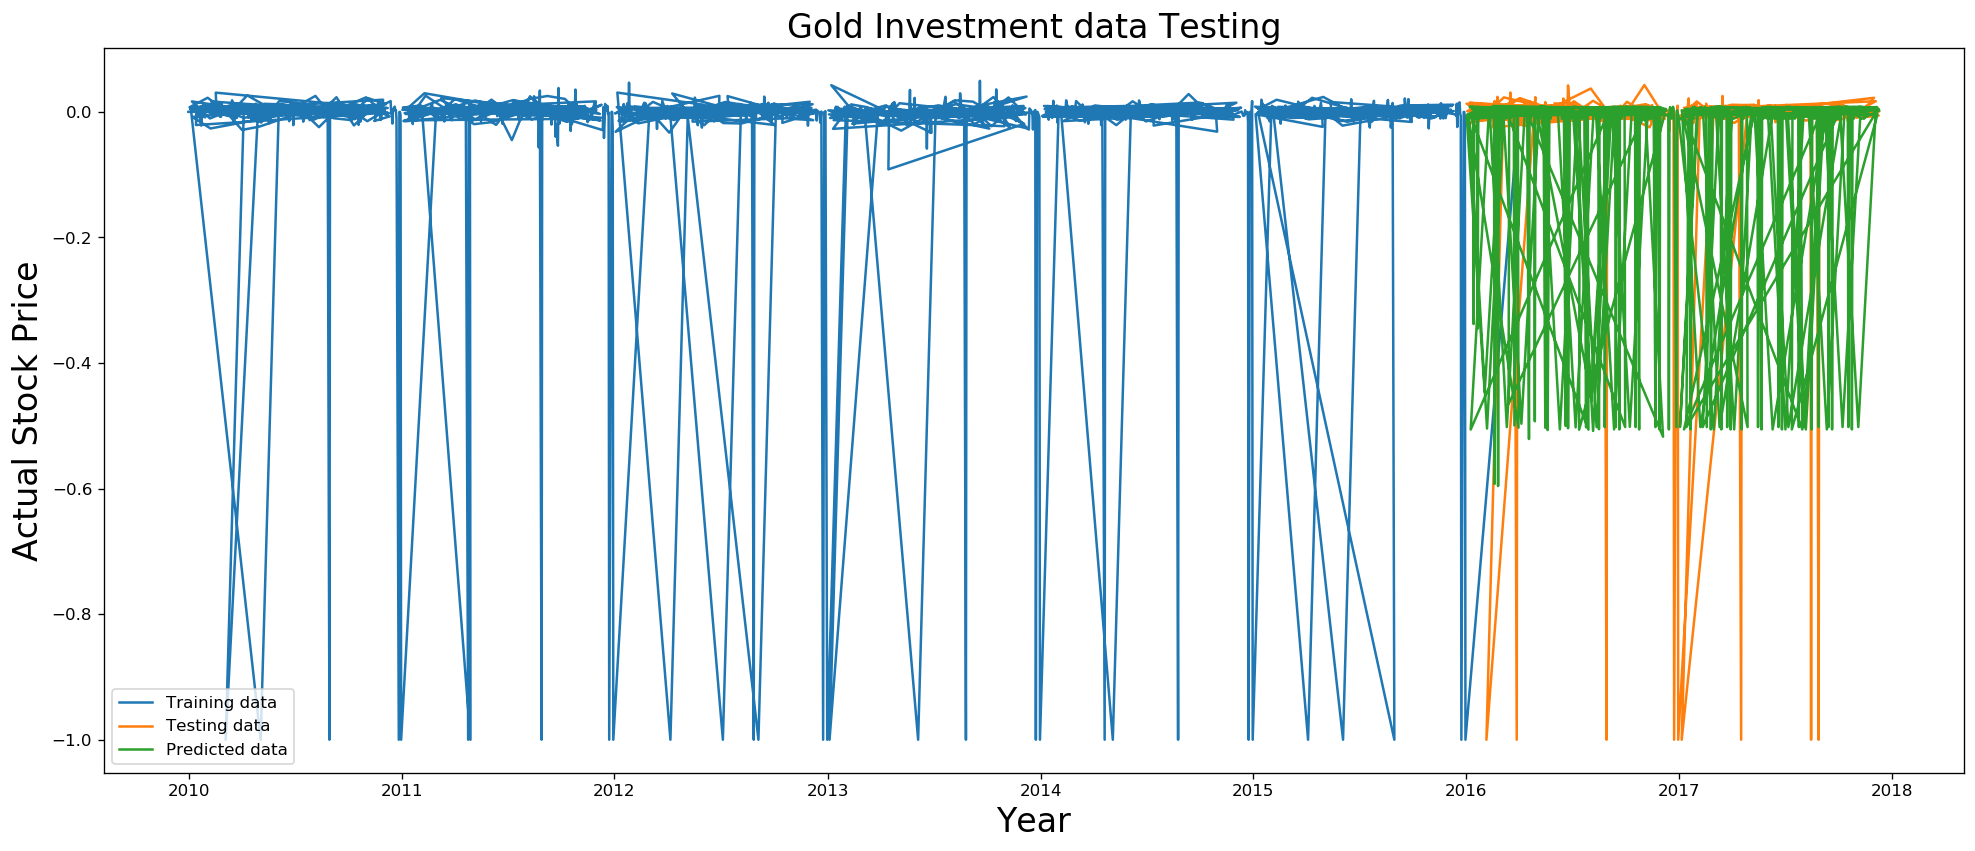

In [21]:
# Forecasting the model over validation data i.e 2017 and 2018

validated_data = model.predict(n_periods=len(validation))
validated_df = pd.DataFrame(validated_data,index = validation.index,columns=['Prediction'])

#plot the predictions for validation set
plt.subplots(figsize=(20,8))
plt.plot(train, label='Training data')
plt.plot(validation, label='Testing data')
plt.plot(validated_df, label='Predicted data')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Actual Stock Price',fontsize=20)
plt.legend(loc='lower left', fontsize=10)
plt.title("Gold Investment data Testing",fontsize=20)
plt.show()

In [22]:
# Displaying the predicted data
validated_df.head(10)

,Prediction
Date,
2016-06-01,0.005463
2016-07-01,-0.006665
2016-08-01,-0.000619
2016-11-01,0.006224
2016-12-01,0.004538
2016-01-13,-0.006654
2016-01-14,-0.337903
2016-01-15,0.002480
2016-01-19,-0.006471


In [23]:
# Saving the data in a dataframe
validated_df["Previous"]=df_gold_investment["Gold Investments"]
validated_df.head(10)

,Prediction,Previous
Date,,
2016-06-01,0.005463,0.013370
2016-07-01,-0.006665,0.013698
2016-08-01,-0.000619,-0.004067
2016-11-01,0.006224,-0.000998
2016-12-01,0.004538,-0.013945
2016-01-13,-0.006654,0.002534
2016-01-14,-0.337903,0.000230
2016-01-15,0.002480,0.004915
2016-01-19,-0.006471,-0.006857


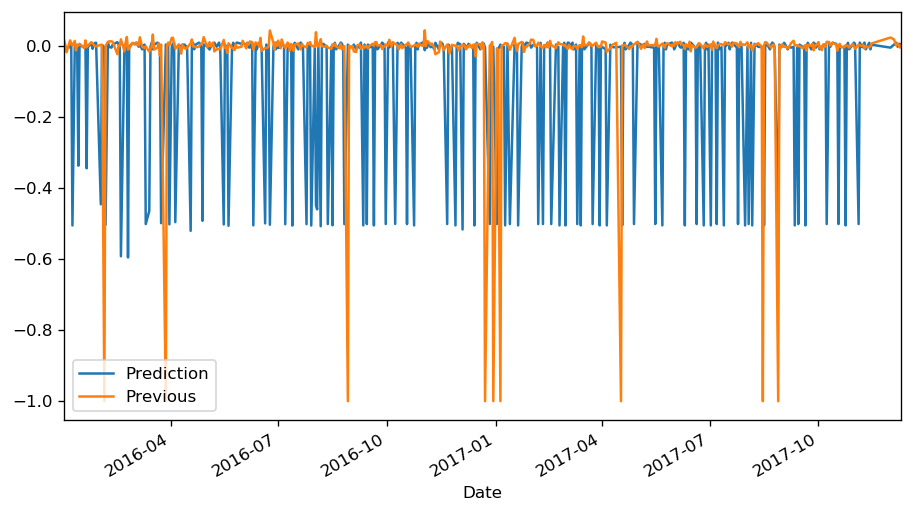

In [24]:
# Plotting Previous and predicted values...
validated_df.plot()

In [25]:
# Printing Errors..
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(validation, validated_data)
print('MSE(Mean Squarred Error): '+str(mse))
mae = mean_absolute_error(validation, validated_data)
print('MAE(Mean Absolute Error): '+str(mae))
rmse = np.sqrt(mean_squared_error(validation, validated_data))
print('RMSE(Root Mean Squared Error): '+str(rmse))

MSE(Mean Squarred Error): 0.05860494712608736
MAE(Mean Absolute Error): 0.10649062863857861
RMSE(Root Mean Squared Error): 0.24208458671730293


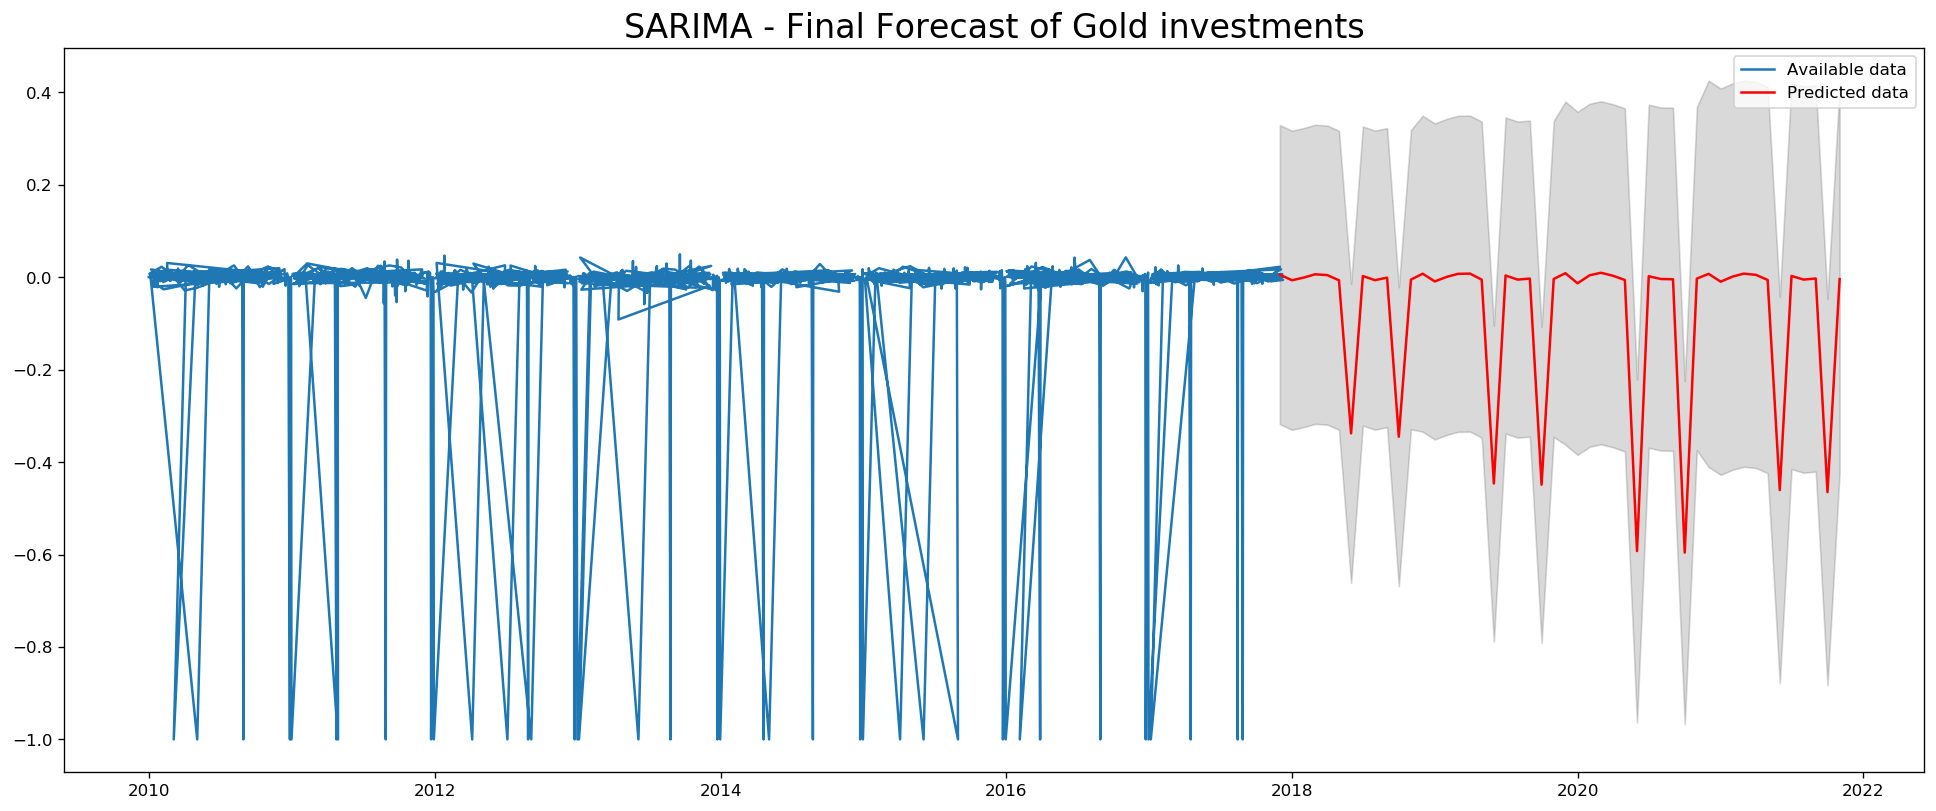

In [26]:
# Forecasting the model over the 2018 - 2021 years..

fitted, confint = model.predict(n_periods=48, return_conf_int=True)
index_of_fc = pd.date_range(validation.index[-1], periods = 48, freq='MS')

# make series for plotting purpose
forecast_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.subplots(figsize=(20,8))
plt.plot(df_gold_investment,label='Available data')
plt.plot(forecast_series, color='red',label='Predicted data')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.legend()
plt.title("SARIMA - Final Forecast of Gold investments",fontsize=20)
plt.show()

In [27]:
# Displaying the forecasted data..
forecast_series.head()

2017-12-01    0.005463
2018-01-01   -0.006665
2018-02-01   -0.000619
2018-03-01    0.006224
2018-04-01    0.004538
Freq: MS, dtype: float64

In [28]:
# Creating a dataframe for the forecasted data
forecast_series_df = pd.DataFrame(forecast_series,columns=["Gold_Predictions"]) 
forecast_series_df.index.name="Date"
forecast_series_df.head()

,Gold_Predictions
Date,
2017-12-01,0.005463
2018-01-01,-0.006665
2018-02-01,-0.000619
2018-03-01,0.006224
2018-04-01,0.004538


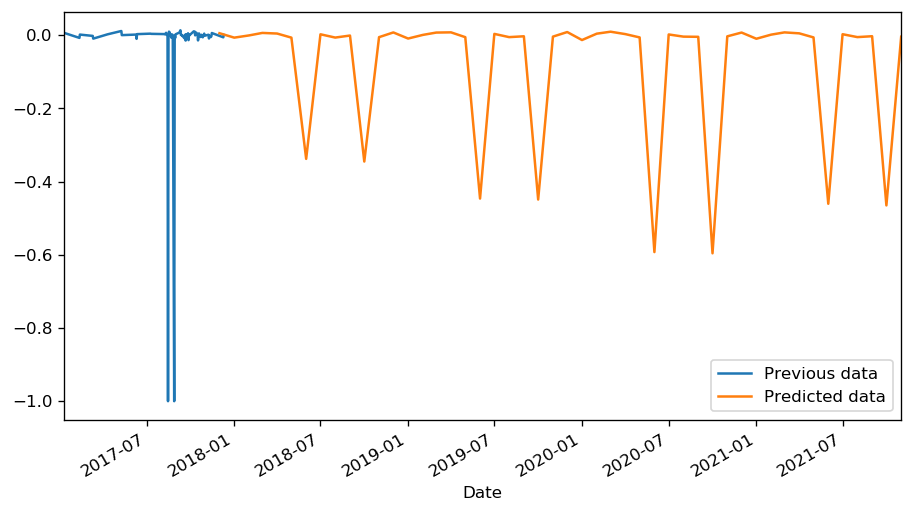

In [29]:
# Plotting the forecasted values..
validation[400:471].plot(label='Previous data')
forecast_series.plot(label='Predicted data')
plt.legend()

In [31]:
#Save the predicted values into a excel file
forecast_series_df.to_excel("Gold_Investments_Predictions.xlsx")

# Conclusion (According to the 2018-2021 forecast i.e 4 years):

>> 1) In the month of (August-September),2017 the prices were too low and after that from month (october to december) the prices increases as compared to that of month september,2017.   
>> 2) If the company is not looking for the long term investment, In (October-December) of the forecasted years i.e from 2018-2021, the prices will increases so according to the model tht is the best time to sell them.        
>> 3) If looking for the long term investment, the company can invest more in gold in the month of (June-July),2021 is the best time to invest as at this time period prices would be low.        

# End of the document